# <span style='color:Blue'> COSMOTE</span> <span style='color:Green'> AWARDS</span>

## <span style='background :Blue' ><span style='color:White'> **Salesforce**  </span></span>



---

> Boura Anastasia, IT Business System Engineer <br />
> CRM Systems <br />
> OTE A.E <br />
> ampoura@cosmote.gr / ampoura@ote.gr

![Cosmote Awards](Awards.png)

### In this project we will analyze the impact that the introduction of `SALESFORCE`,  a new CRM System ,has in our company . 

The Pillars of our Analysis are :
* Agility
* Business Impact
* Creativity
* User Experience
* Growth Mindset

# <span style='background :Blue' ><span style='color:White'> AGILITY </span></span>

> There’s a lot of confusion on what it actually means to be Agile. Agility is about being flexible and adapting your plan based on feedback from incremental deliverables.

## What Are Agile Metrics?

Agile metrics are an essential component of the development process. For companies or teams that work on the agile framework, agile metrics help in assessing software quality.By measuring how productive a team is, agile metrics help keep the team performance in check.
If there are any loopholes, they expose them at the initial stages.Now that we know what agile metrics are, let’s break down how they work. The entire concept of agile rests on continuous improvement (CI)

Salesforce Team choosed `Jira Software` to monitor the development of all issues . We will use this dataset 
```SQL
project = USSFA AND status in (To-Do, Reopened, "To Do", "In Progress", Open, "In Review", "Peer Review", New, Planning, Ready, "Ready for Test", "NATCO APPROVAL", "PO Approval", "US Blocked", "Pending Clarifications", "Internal tests", "Ready for Deloitte test", "Deloitte testing", "Code Review", "Fix deployed to SIT/UAT", "prod fix prepared", "request for prod package", "fix deployed to prod", "fix prepared", "request for package", freezed) AND Package in (GR) ORDER BY cf[13107] DESC, cf[13300] DESC
```

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

from collections import defaultdict

%matplotlib inline

matplotlib.style.use('ggplot')

pd.set_option("display.max_columns", None)

In [2]:
jiraPart1 = pd.read_csv('JiraPart1.csv')
jiraPart2 = pd.read_csv('JiraPart2.csv')

frames = [jiraPart1, jiraPart2]

jira = pd.concat(frames).drop_duplicates().reset_index(drop=True)
jira

,Summary,Issue key,Issue id,Parent id,Issue Type,Status,Project key,Project name,Project type,Project lead,Project description,Project url,Priority,Resolution,Assignee,Reporter,Creator,Created,Updated,Last Viewed,Resolved,Affects Version/s,Fix Version/s,Due Date,Votes,Labels,Labels.1,Labels.2,Labels.3,Labels.4,Labels.5,Labels.6,Labels.7,Labels.8,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers.4,Watchers.5,Watchers.6,Watchers.7,Watchers.8,Watchers.9,Watchers.10,Watchers.11,Watchers.12,Watchers.13,Watchers.14,Watchers.15,Watchers.16,Log Work,Log Work.1,Original Estimate,Remaining Estimate,Time Spent,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent,Security Level,Inward issue link (Automates),Inward issue link (Automates).1,Inward issue link (Automates).2,Inward issue link (Automates).3,Inward issue link (Automates).4,Inward issue link (Automates).5,Inward issue link (Automates).6,Outward issue link (Automates),Outward issue link (Automates).1,Outward issue link (Automates).2,Outward issue link (Automates).3,Inward issue link (Blocks),Inward issue link (Blocks).1,Inward issue link (Blocks).2,Inward issue link (Blocks).3,Inward issue link (Blocks).4,Inward issue link (Blocks).5,Inward issue link (Blocks).6,Inward issue link (Blocks).7,Inward issue link (Blocks).8,Inward issue link (Blocks).9,Outward issue link (Blocks),Outward issue link (Blocks).1,Outward issue link (Blocks).2,Outward issue link (Blocks).3,Outward issue link (Blocks).4,Outward issue link (Blocks).5,Inward issue link (Cloners),Inward issue link (Cloners).1,Outward issue link (Cloners),Outward issue link (Defect),Inward issue link (Deprecation),Outward issue link (Deprecation),Outward issue link (Extension),Inward issue link (Gantt End to Start),Inward issue link (Relates),Inward issue link (Relates).1,Inward issue link (Relates).2,Inward issue link (Relates).3,Inward issue link (Relates).4,Inward issue link (Relates).5,Inward issue link (Relates).6,Inward issue link (Relates).7,Inward issue link (Relates).8,Inward issue link (Relates).9,Outward issue link (Relates),Outward issue link (Relates).1,Outward issue link (Relates).2,Outward issue link (Relates).3,Inward issue link (Test Case),Inward issue link (Test Case).1,Outward issue link (Test Case),Outward issue link (Test Case).1,Outward issue link (Test Case).2,Outward issue link (Test Case).3,Outward issue link (Test Case).4,Outward issue link (Test Case).5,Outward issue link (Test Case).6,Outward issue link (Test Case).7,Outward issue link (Test Case).8,Outward issue link (Test Case).9,Outward issue link (Test Case).10,Outward issue link (Test Case).11,Outward issue link (Test Case).12,Attachment,Attachment.1,Attachment.2,Attachment.3,Attachment.4,Attachment.5,Attachment.6,Attachment.7,Attachment.8,Attachment.9,Attachment.10,Attachment.11,Attachment.12,Attachment.13,Attachment.14,Attachment.15,Attachment.16,Attachment.17,Attachment.18,Attachment.19,Attachment.20,Attachment.21,Attachment.22,Attachment.23,Attachment.24,Attachment.25,Attachment.26,Attachment.27,Attachment.28,Attachment.29,Attachment.30,Attachment.31,Attachment.32,Attachment.33,Attachment.34,Attachment.35,Attachment.36,Attachment.37,Attachment.38,Attachment.39,Attachment.40,Attachment.41,Attachment.42,Attachment.43,Attachment.44,Attachment.45,Attachment.46,Attachment.47,Custom field (API Version),Custom field (AT Jira FEAT),Custom field (Acceptance Criteria),Custom field (Actual End),Custom field (Actual Execution Date),Custom field (Actual Passed Date),Custom field (Actual Start),Custom field (Actual execution date),Custom field (Actual passed date),Custom field (Affected Version),Custom field (Age),Custom field (App Credentials),Custom field (BFF needed),Custom field (Backend Environment),Custom field (Baseline Effort),Custom field (Baseline End),Custom field (Baseline Start),Custom field (Baseline end date),Custom field (Baseline start date),Custom field (Business Functionality),Custom field (Business V

This is a really big dataset .
First of all we will drop all columns that are empty 

In [3]:
jira.dropna(how='all', inplace=True, axis=1)
jira

,Summary,Issue key,Issue id,Parent id,Issue Type,Status,Project key,Project name,Project type,Project lead,Priority,Resolution,Assignee,Reporter,Creator,Created,Updated,Last Viewed,Resolved,Affects Version/s,Fix Version/s,Due Date,Votes,Labels,Labels.1,Labels.2,Labels.3,Labels.4,Labels.5,Labels.6,Labels.7,Labels.8,Description,Environment,Watchers,Watchers.1,Watchers.2,Watchers.3,Watchers.4,Watchers.5,Watchers.6,Watchers.7,Watchers.8,Watchers.9,Watchers.10,Watchers.11,Watchers.12,Watchers.13,Watchers.14,Watchers.15,Watchers.16,Log Work,Log Work.1,Original Estimate,Remaining Estimate,Time Spent,Work Ratio,Σ Original Estimate,Σ Remaining Estimate,Σ Time Spent,Inward issue link (Automates),Inward issue link (Automates).1,Inward issue link (Automates).2,Inward issue link (Automates).3,Inward issue link (Automates).4,Inward issue link (Automates).5,Inward issue link (Automates).6,Outward issue link (Automates),Outward issue link (Automates).1,Outward issue link (Automates).2,Outward issue link (Automates).3,Inward issue link (Blocks),Inward issue link (Blocks).1,Inward issue link (Blocks).2,Inward issue link (Blocks).3,Inward issue link (Blocks).4,Inward issue link (Blocks).5,Inward issue link (Blocks).6,Inward issue link (Blocks).7,Inward issue link (Blocks).8,Inward issue link (Blocks).9,Outward issue link (Blocks),Outward issue link (Blocks).1,Outward issue link (Blocks).2,Outward issue link (Blocks).3,Outward issue link (Blocks).4,Outward issue link (Blocks).5,Inward issue link (Cloners),Inward issue link (Cloners).1,Outward issue link (Cloners),Outward issue link (Defect),Inward issue link (Deprecation),Outward issue link (Deprecation),Outward issue link (Extension),Inward issue link (Gantt End to Start),Inward issue link (Relates),Inward issue link (Relates).1,Inward issue link (Relates).2,Inward issue link (Relates).3,Inward issue link (Relates).4,Inward issue link (Relates).5,Inward issue link (Relates).6,Inward issue link (Relates).7,Inward issue link (Relates).8,Inward issue link (Relates).9,Outward issue link (Relates),Outward issue link (Relates).1,Outward issue link (Relates).2,Outward issue link (Relates).3,Inward issue link (Test Case),Inward issue link (Test Case).1,Outward issue link (Test Case),Outward issue link (Test Case).1,Outward issue link (Test Case).2,Outward issue link (Test Case).3,Outward issue link (Test Case).4,Outward issue link (Test Case).5,Outward issue link (Test Case).6,Outward issue link (Test Case).7,Outward issue link (Test Case).8,Outward issue link (Test Case).9,Outward issue link (Test Case).10,Outward issue link (Test Case).11,Outward issue link (Test Case).12,Attachment,Attachment.1,Attachment.2,Attachment.3,Attachment.4,Attachment.5,Attachment.6,Attachment.7,Attachment.8,Attachment.9,Attachment.10,Attachment.11,Attachment.12,Attachment.13,Attachment.14,Attachment.15,Attachment.16,Attachment.17,Attachment.18,Attachment.19,Attachment.20,Attachment.21,Attachment.22,Attachment.23,Attachment.24,Attachment.25,Attachment.26,Attachment.27,Attachment.28,Attachment.29,Attachment.30,Attachment.31,Attachment.32,Attachment.33,Attachment.34,Attachment.35,Attachment.36,Attachment.37,Attachment.38,Attachment.39,Attachment.40,Attachment.41,Attachment.42,Attachment.43,Attachment.44,Attachment.45,Attachment.46,Attachment.47,Custom field (Acceptance Criteria),Custom field (Actual execution date),Custom field (Actual passed date),Custom field (Deployment Comments),Custom field (Discussion Due Date),Custom field (Discussion Status),Custom field (Discussion Status Description),Custom field (End date),Custom field (Epic Link),Custom field (Epic Name),Custom field (Epic Status),Custom field (Estimate),Custom field (First Estimate),Custom field (Fixed Version SFA Prod),Custom field (Fixed version Legacy),Custom field (Fixed version SFA SIT),Custom field (Integration),Custom field (Migration),Custom field (NatCo),Custom field (Original User Story ID),Custom field (Package),Custom field (Package).1,Custom field (Pa

In [4]:
jira.isna().sum()

Summary           0
Issue key         0
Issue id          0
Parent id      1281
Issue Type        0
               ... 
Comment.107    1299
Comment.108    1299
Comment.109    1299
Comment.110    1299
Comment.111    1299
Length: 402, dtype: int64

In [5]:
jira.dropna(thresh=1290,inplace=True, axis=1)
jira

,Summary,Issue key,Issue id,Issue Type,Status,Project key,Project name,Project type,Project lead,Reporter,Creator,Created,Updated,Last Viewed,Votes,Custom field (End date),Custom field (Package),Custom field (Rank),Custom field (Release Date),Custom field (Start date)
0,accounts with non blank account division,USSFA-6594,188558,Task,Done,USSFA,Salesforce Automation,software,dragos.jijau,ELeodi,ELeodi,26/Oct/21 12:48 PM,02/Dec/21 10:10 AM,07/Feb/22 1:46 AM,0,27/Oct/21 11:59 PM,GR,2|i0de2n:,1970-01-01 01:00:00.0,27/Oct/21 12:00 AM
1,Automation Configuration script update,USSFA-6561,187341,Task,Done,USSFA,Salesforce Automation,software,dragos.jijau,damkowalski,jwszolkowski,20/Oct/21 12:48 PM,28/Oct/21 3:17 PM,07/Feb/22 1:46 AM,0,20/Oct/21 11:59 PM,CZ/SK,2|i0d6m7:,1970-01-01 01:00:00.0,20/Oct/21 12:00 AM
2,attachment when subscribing to reports,USSFA-6475,181658,Task,Done,USSFA,Salesforce Automation,software,dragos.jijau,ELeodi,ELeodi,23/Sep/21 9:43 AM,03/Dec/21 3:18 PM,07/Feb/22 1:46 AM,0,23/Sep/21 11:59 PM,GR,2|i0c8dz:,1970-01-01 01:00:00.0,23/Sep/21 12:00 AM
3,Export capability on reports,USSFA-6020,160410,Story,Done,USSFA,Salesforce Automation,software,dragos.jijau,tkiritsi,tkiritsi,11/Jun/21 5:24 PM,28/Jul/21 4:41 PM,07/Feb/22 1:46 AM,0,11/Jun/21 12:00 AM,GR,2|i08op3:,1970-01-01 01:00:00.0,11/Jun/21 12:00 AM
4,Calendar event view adjustments,USSFA-6019,160408,Story,Done,USSFA,Salesforce Automation,software,dragos.jijau,tkiritsi,tkiritsi,11/Jun/21 5:22 PM,14/Oct/21 3:15 PM,07/Feb/22 1:46 AM,0,11/Jun/21 12:00 AM,GR,2|i08oon:,1970-01-01 01:00:00.0,11/Jun/21 12:00 AM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,Update Address in SF,USSFA-967,79267,Story,Cancelled,USSFA,Salesforce Automation,software,dragos.jijau,oana.ene,dennguyen,22/May/20 6:18 PM,27/Jan/21 3:59 PM,07/Feb/22 1:45 AM,0,22/May/20 12:00 AM,GR,2|hzvgcv:,1970-01-01 01:00:00.0,22/May/20 12:00 AM
1296,CANCEL - Account Data Specifics GR [DUPLICATE],USSFA-961,79261,Story,Cancelled,USSFA,Salesforce Automation,software,dragos.jijau,oana.ene,dennguyen,22/May/20 6:18 PM,27/Jan/21 4:00 PM,07/Feb/22 1:45 AM,0,22/May/20 11:59 PM,GR,2|hzvgbr:,1970-01-01 01:00:00.0,22/May/20 12:00 AM
1297,Synchronization of Tasks and Events with Outlo...,USSFA-831,78783,Story,Cancelled,USSFA,Salesforce Automation,software,dragos.jijau,oana.ene,frigojozsef,20/May/20 7:15 PM,10/Mar/21 11:30 AM,07/Feb/22 1:45 AM,0,01/Jul/20 11:59 PM,GR,2|hzvdin:,1970-01-01 01:00:00.0,01/Jul/20 12:00 AM
1298,Authentication of users through AD - GR,USSFA-824,78776,Story,Cancelled,USSFA,Salesforce Automation,software,dragos.jijau,oana.ene,frigojozsef,20/May/20 7:15 PM,27/Jan/21 4:00 PM,07/Feb/22 1:45 AM,0,01/Jul/20 11:59 PM,GR,2|hzvdhb:,1970-01-01 01:00:00.0,01/Jul/20 12:00 AM


In [6]:
jira.columns

Index(['Summary', 'Issue key', 'Issue id', 'Issue Type', 'Status',
       'Project key', 'Project name', 'Project type', 'Project lead',
       'Reporter', 'Creator', 'Created', 'Updated', 'Last Viewed', 'Votes',
       'Custom field (End date)', 'Custom field (Package)',
       'Custom field (Rank)', 'Custom field (Release Date)',
       'Custom field (Start date)'],
      dtype='object')

In [7]:
jira.loc[200]

Summary                        Account and Contact Phone Number fields custom...
Issue key                                                             USSFA-5231
Issue id                                                                  142980
Issue Type                                                                  Test
Status                                                                      Done
Project key                                                                USSFA
Project name                                              Salesforce Automation 
Project type                                                            software
Project lead                                                        dragos.jijau
Reporter                                                         theofani.ntamsa
Creator                                                          theofani.ntamsa
Created                                                       29/Mar/21 11:45 AM
Updated                     

In [8]:
jira['Issue Type'].unique()

array(['Task', 'Story', 'Test', 'Epic', 'Sub-task', 'Bug'], dtype=object)

| Columns | Description/Values | Needed|
| :---: | :---: | :---: |
| Summary | Issue Summary | <input type="checkbox"> </input> |
| Issue key | Key that is provided by jira (like USSFA-6819)  | <input type="checkbox"> </input> |
| Issue id | Jira id | <input type="checkbox"> </input> |
| Issue Type | ['Story', 'Bug', 'Task', 'Sub-task', 'Test'] | <input type="checkbox"> </input> |
| Status | US Blocked New NATCO APPROVAL In Progress Ready To Do Open fix prepared | <input type="checkbox"> </input> |
| Project key | 'USSFA' | <input type="checkbox"> </input> |
| Project name | Salesforce Automation | <input type="checkbox"> </input> |
| Project type | software | <input type="checkbox"> </input> |
| Project lead | dragos.jijau | <input type="checkbox"> </input> |
| Reporter | who reported the issue | <input type="checkbox"> </input> |
| Creator | who created the issue | <input type="checkbox"> </input> |
| Created | creation date | <input type="checkbox"> </input> |
| Updated | last updated date | <input type="checkbox"> </input> |
| Last Viewed | last viewed date | <input type="checkbox"> </input> |
| Votes | only the value 0 | <input type="checkbox"> </input> |
| Watchers | Who is watching the issue | <input type="checkbox"> </input> |
| Custom field (End date) | Issue Summary | <input type="checkbox"> </input> |
| Custom field (Package) | Issue Summary | <input type="checkbox"> </input> |
| Custom field (Rank) | Issue Summary | <input type="checkbox"> </input> |
| Custom field (Release Date) | Issue Summary | <input type="checkbox"> </input> |
| Custom field (Start date) | Issue Summary | <input type="checkbox"> </input> |
| Custom field (Watcher(s)) | Issue Summary | <input type="checkbox"> </input> |

In [9]:
jira.drop(['Issue id','Project key', 'Project name', 'Project type', 'Project lead','Votes',
        'Custom field (End date)', 'Custom field (Package)',
       'Custom field (Rank)', 'Custom field (Release Date)',
       'Custom field (Start date)'], inplace=True , axis=1)

jira

,Summary,Issue key,Issue Type,Status,Reporter,Creator,Created,Updated,Last Viewed
0,accounts with non blank account division,USSFA-6594,Task,Done,ELeodi,ELeodi,26/Oct/21 12:48 PM,02/Dec/21 10:10 AM,07/Feb/22 1:46 AM
1,Automation Configuration script update,USSFA-6561,Task,Done,damkowalski,jwszolkowski,20/Oct/21 12:48 PM,28/Oct/21 3:17 PM,07/Feb/22 1:46 AM
2,attachment when subscribing to reports,USSFA-6475,Task,Done,ELeodi,ELeodi,23/Sep/21 9:43 AM,03/Dec/21 3:18 PM,07/Feb/22 1:46 AM
3,Export capability on reports,USSFA-6020,Story,Done,tkiritsi,tkiritsi,11/Jun/21 5:24 PM,28/Jul/21 4:41 PM,07/Feb/22 1:46 AM
4,Calendar event view adjustments,USSFA-6019,Story,Done,tkiritsi,tkiritsi,11/Jun/21 5:22 PM,14/Oct/21 3:15 PM,07/Feb/22 1:46 AM
...,...,...,...,...,...,...,...,...,...
1295,Update Address in SF,USSFA-967,Story,Cancelled,oana.ene,dennguyen,22/May/20 6:18 PM,27/Jan/21 3:59 PM,07/Feb/22 1:45 AM
1296,CANCEL - Account Data Specifics GR [DUPLICATE],USSFA-961,Story,Cancelled,oana.ene,dennguyen,22/May/20 6:18 PM,27/Jan/21 4:00 PM,07/Feb/22 1:45 AM
1297,Synchronization of Tasks and Events with Outlo...,USSFA-831,Story,Cancelled,oana.ene,frigojozsef,20/May/20 7:15 PM,10/Mar/21 11:30 AM,07/Feb/22 1:45 AM
1298,Authentication of users through AD - GR,USSFA-824,Story,Cancelled,oana.ene,frigojozsef,20/May/20 7:15 PM,27/Jan/21 4:00 PM,07/Feb/22 1:45 AM


In [10]:
# NO missing values
jira.isna().sum()

Summary        0
Issue key      0
Issue Type     0
Status         0
Reporter       0
Creator        0
Created        0
Updated        0
Last Viewed    0
dtype: int64

In [11]:
jira.rename(columns = {'Issue Type': 'Type', 'Issue key': 'key', 'Last Viewed': 'last_view'}, inplace = True)

jira

,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view
0,accounts with non blank account division,USSFA-6594,Task,Done,ELeodi,ELeodi,26/Oct/21 12:48 PM,02/Dec/21 10:10 AM,07/Feb/22 1:46 AM
1,Automation Configuration script update,USSFA-6561,Task,Done,damkowalski,jwszolkowski,20/Oct/21 12:48 PM,28/Oct/21 3:17 PM,07/Feb/22 1:46 AM
2,attachment when subscribing to reports,USSFA-6475,Task,Done,ELeodi,ELeodi,23/Sep/21 9:43 AM,03/Dec/21 3:18 PM,07/Feb/22 1:46 AM
3,Export capability on reports,USSFA-6020,Story,Done,tkiritsi,tkiritsi,11/Jun/21 5:24 PM,28/Jul/21 4:41 PM,07/Feb/22 1:46 AM
4,Calendar event view adjustments,USSFA-6019,Story,Done,tkiritsi,tkiritsi,11/Jun/21 5:22 PM,14/Oct/21 3:15 PM,07/Feb/22 1:46 AM
...,...,...,...,...,...,...,...,...,...
1295,Update Address in SF,USSFA-967,Story,Cancelled,oana.ene,dennguyen,22/May/20 6:18 PM,27/Jan/21 3:59 PM,07/Feb/22 1:45 AM
1296,CANCEL - Account Data Specifics GR [DUPLICATE],USSFA-961,Story,Cancelled,oana.ene,dennguyen,22/May/20 6:18 PM,27/Jan/21 4:00 PM,07/Feb/22 1:45 AM
1297,Synchronization of Tasks and Events with Outlo...,USSFA-831,Story,Cancelled,oana.ene,frigojozsef,20/May/20 7:15 PM,10/Mar/21 11:30 AM,07/Feb/22 1:45 AM
1298,Authentication of users through AD - GR,USSFA-824,Story,Cancelled,oana.ene,frigojozsef,20/May/20 7:15 PM,27/Jan/21 4:00 PM,07/Feb/22 1:45 AM


## What type of Issue we used more often? 

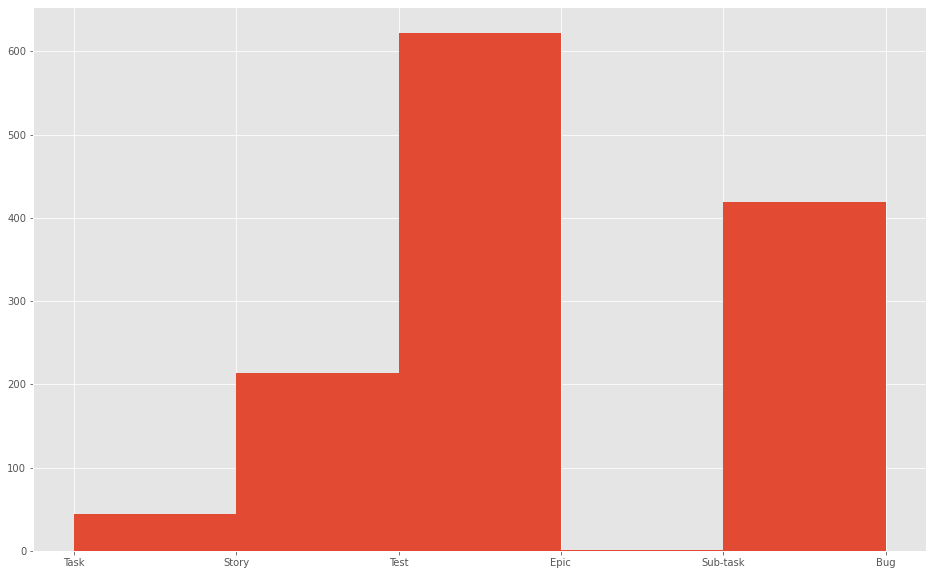

In [12]:
plt.figure(figsize=(16, 10))
plt.hist(jira.Type, histtype='bar', bins=5)

plt.show()


In [13]:
jira['Type'].value_counts()

Test        622
Bug         400
Story       214
Task         44
Sub-task     19
Epic          1
Name: Type, dtype: int64

In [14]:
jira['Created'] = pd.to_datetime(jira['Created'])

In [15]:
jira['Updated'] = pd.to_datetime(jira['Updated'])
jira['last_view'] = pd.to_datetime(jira['last_view'])

In [16]:
jira


,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view
0,accounts with non blank account division,USSFA-6594,Task,Done,ELeodi,ELeodi,2021-10-26 12:48:00,2021-12-02 10:10:00,2022-02-07 01:46:00
1,Automation Configuration script update,USSFA-6561,Task,Done,damkowalski,jwszolkowski,2021-10-20 12:48:00,2021-10-28 15:17:00,2022-02-07 01:46:00
2,attachment when subscribing to reports,USSFA-6475,Task,Done,ELeodi,ELeodi,2021-09-23 09:43:00,2021-12-03 15:18:00,2022-02-07 01:46:00
3,Export capability on reports,USSFA-6020,Story,Done,tkiritsi,tkiritsi,2021-06-11 17:24:00,2021-07-28 16:41:00,2022-02-07 01:46:00
4,Calendar event view adjustments,USSFA-6019,Story,Done,tkiritsi,tkiritsi,2021-06-11 17:22:00,2021-10-14 15:15:00,2022-02-07 01:46:00
...,...,...,...,...,...,...,...,...,...
1295,Update Address in SF,USSFA-967,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:18:00,2021-01-27 15:59:00,2022-02-07 01:45:00
1296,CANCEL - Account Data Specifics GR [DUPLICATE],USSFA-961,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:18:00,2021-01-27 16:00:00,2022-02-07 01:45:00
1297,Synchronization of Tasks and Events with Outlo...,USSFA-831,Story,Cancelled,oana.ene,frigojozsef,2020-05-20 19:15:00,2021-03-10 11:30:00,2022-02-07 01:45:00
1298,Authentication of users through AD - GR,USSFA-824,Story,Cancelled,oana.ene,frigojozsef,2020-05-20 19:15:00,2021-01-27 16:00:00,2022-02-07 01:45:00


In [17]:
weekly = jira.groupby(jira.Created.dt.isocalendar().week)
len(weekly)

51

In [18]:
y = weekly.size()
y.head(3)

week
1     3
2     8
3    23
dtype: int64

In [19]:
x = weekly.Created.min()
x[:3]

week
1   2021-01-07 14:48:00
2   2021-01-11 08:25:00
3   2021-01-18 08:18:00
Name: Created, dtype: datetime64[ns]

Text(0, 0.5, 'Creation of Jira Issues')

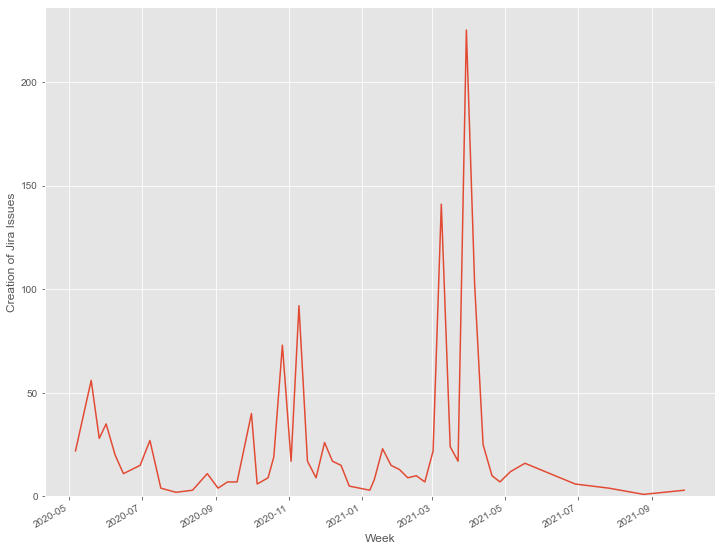

In [20]:
pd.Series(y.values, index=x).plot(figsize=(12, 10)) # We use the indices of x and the values of y
plt.style.use('seaborn')
plt.ylim(0) # Set the lower y value to 0
plt.xlabel('Week') # Label of the x axis
plt.ylabel('Creation of Jira Issues') # Label of the y axis

In [21]:
jira['time']=jira['Updated']-jira['Created']

jira

,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view,time
0,accounts with non blank account division,USSFA-6594,Task,Done,ELeodi,ELeodi,2021-10-26 12:48:00,2021-12-02 10:10:00,2022-02-07 01:46:00,36 days 21:22:00
1,Automation Configuration script update,USSFA-6561,Task,Done,damkowalski,jwszolkowski,2021-10-20 12:48:00,2021-10-28 15:17:00,2022-02-07 01:46:00,8 days 02:29:00
2,attachment when subscribing to reports,USSFA-6475,Task,Done,ELeodi,ELeodi,2021-09-23 09:43:00,2021-12-03 15:18:00,2022-02-07 01:46:00,71 days 05:35:00
3,Export capability on reports,USSFA-6020,Story,Done,tkiritsi,tkiritsi,2021-06-11 17:24:00,2021-07-28 16:41:00,2022-02-07 01:46:00,46 days 23:17:00
4,Calendar event view adjustments,USSFA-6019,Story,Done,tkiritsi,tkiritsi,2021-06-11 17:22:00,2021-10-14 15:15:00,2022-02-07 01:46:00,124 days 21:53:00
...,...,...,...,...,...,...,...,...,...,...
1295,Update Address in SF,USSFA-967,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:18:00,2021-01-27 15:59:00,2022-02-07 01:45:00,249 days 21:41:00
1296,CANCEL - Account Data Specifics GR [DUPLICATE],USSFA-961,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:18:00,2021-01-27 16:00:00,2022-02-07 01:45:00,249 days 21:42:00
1297,Synchronization of Tasks and Events with Outlo...,USSFA-831,Story,Cancelled,oana.ene,frigojozsef,2020-05-20 19:15:00,2021-03-10 11:30:00,2022-02-07 01:45:00,293 days 16:15:00
1298,Authentication of users through AD - GR,USSFA-824,Story,Cancelled,oana.ene,frigojozsef,2020-05-20 19:15:00,2021-01-27 16:00:00,2022-02-07 01:45:00,251 days 20:45:00


In [22]:
jira['time']=jira['time'].dt.days

In [23]:
jira

,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view,time
0,accounts with non blank account division,USSFA-6594,Task,Done,ELeodi,ELeodi,2021-10-26 12:48:00,2021-12-02 10:10:00,2022-02-07 01:46:00,36
1,Automation Configuration script update,USSFA-6561,Task,Done,damkowalski,jwszolkowski,2021-10-20 12:48:00,2021-10-28 15:17:00,2022-02-07 01:46:00,8
2,attachment when subscribing to reports,USSFA-6475,Task,Done,ELeodi,ELeodi,2021-09-23 09:43:00,2021-12-03 15:18:00,2022-02-07 01:46:00,71
3,Export capability on reports,USSFA-6020,Story,Done,tkiritsi,tkiritsi,2021-06-11 17:24:00,2021-07-28 16:41:00,2022-02-07 01:46:00,46
4,Calendar event view adjustments,USSFA-6019,Story,Done,tkiritsi,tkiritsi,2021-06-11 17:22:00,2021-10-14 15:15:00,2022-02-07 01:46:00,124
...,...,...,...,...,...,...,...,...,...,...
1295,Update Address in SF,USSFA-967,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:18:00,2021-01-27 15:59:00,2022-02-07 01:45:00,249
1296,CANCEL - Account Data Specifics GR [DUPLICATE],USSFA-961,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:18:00,2021-01-27 16:00:00,2022-02-07 01:45:00,249
1297,Synchronization of Tasks and Events with Outlo...,USSFA-831,Story,Cancelled,oana.ene,frigojozsef,2020-05-20 19:15:00,2021-03-10 11:30:00,2022-02-07 01:45:00,293
1298,Authentication of users through AD - GR,USSFA-824,Story,Cancelled,oana.ene,frigojozsef,2020-05-20 19:15:00,2021-01-27 16:00:00,2022-02-07 01:45:00,251


<AxesSubplot:xlabel='Status', ylabel='time'>

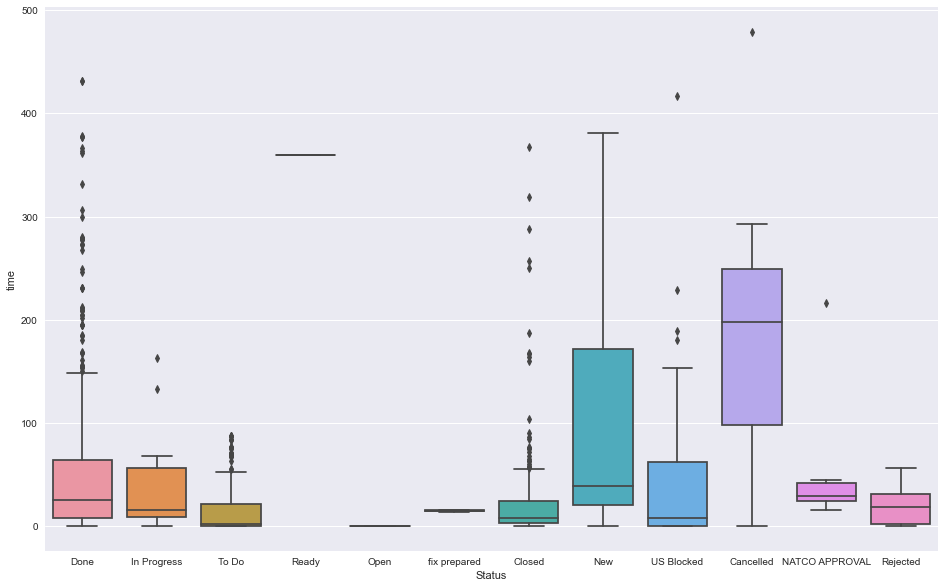

In [24]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='Status', y='time', data=jira)

<Figure size 576x720 with 0 Axes>

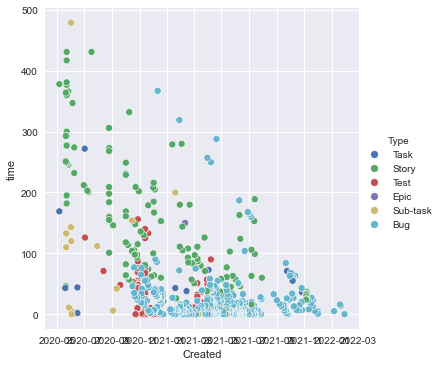

In [25]:
plt.figure(figsize=(8, 10))
sns.relplot(x="Created", y="time", hue="Type", data=jira)

#### How many issues were created and resolved the same day ? 

In [26]:
jira['Status'].unique()

array(['Done', 'In Progress', 'To Do', 'Ready', 'Open', 'fix prepared',
       'Closed', 'New', 'US Blocked', 'Cancelled', 'NATCO APPROVAL',
       'Rejected'], dtype=object)

In [27]:
day_p = jira.Created.dt.day
day_d = jira.Updated.dt.day
selection = ((day_p == day_d) & (jira['Status'] == 'Done') & (jira.Created.dt.month == jira.Updated.dt.month) & (jira.Created.dt.year == jira.Updated.dt.year) )
print(len(jira.loc[selection]))

13


In [28]:
jira.loc[selection]

,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view,time
25,Assign Create Dashboard Folders system permiss...,USSFA-5667,Task,Done,mtzouma,mtzouma,2021-04-15 10:54:00,2021-04-15 17:27:00,2022-02-07 01:46:00,0
79,Mobile data rateplans,USSFA-5475,Test,Done,theofani.ntamsa,theofani.ntamsa,2021-04-07 11:52:00,2021-04-07 16:09:00,2022-02-07 01:46:00,0
80,Mobile voice rateplans,USSFA-5474,Test,Done,theofani.ntamsa,theofani.ntamsa,2021-04-07 11:52:00,2021-04-07 15:57:00,2022-02-07 01:46:00,0
81,Rateplans Mobile - Sum,USSFA-5473,Test,Done,theofani.ntamsa,theofani.ntamsa,2021-04-07 11:52:00,2021-04-07 16:05:00,2022-02-07 01:46:00,0
90,migrated lead,USSFA-5443,Task,Done,ELeodi,ELeodi,2021-04-05 15:09:00,2021-04-05 16:56:00,2022-02-07 01:46:00,0
91,lead from customer care was not assigned to queue,USSFA-5427,Task,Done,ELeodi,ELeodi,2021-04-05 08:38:00,2021-04-05 18:49:00,2022-02-07 01:46:00,0
103,Color ranges,USSFA-5381,Test,Done,theofani.ntamsa,theofani.ntamsa,2021-04-01 09:58:00,2021-04-01 11:06:00,2022-02-07 01:46:00,0
105,Home page for Telesales,USSFA-5379,Test,Done,theofani.ntamsa,theofani.ntamsa,2021-04-01 09:58:00,2021-04-01 10:36:00,2022-02-07 01:46:00,0
106,Submit response in case no Contact on Account,USSFA-5378,Test,Done,theofani.ntamsa,theofani.ntamsa,2021-04-01 09:58:00,2021-04-01 11:06:00,2022-02-07 01:46:00,0
314,Create User by requesting IDM Role - Bug,USSFA-5086,Test,Done,theofani.ntamsa,george.menikidis,2021-03-23 18:11:00,2021-03-23 20:05:00,2022-02-07 01:46:00,0


### We can see that only Tasks and Test issues were solved within one day 

In [29]:
selection = ((day_p == day_d) & (jira['Status'] == 'Closed') & (jira.Created.dt.month == jira.Updated.dt.month) & (jira.Created.dt.year == jira.Updated.dt.year) )
print(len(jira.loc[selection]))

30


In [30]:
jira.loc[selection]

,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view,time
845,wrong totals in reporting,USSFA-6480,Bug,Closed,ELeodi,ELeodi,2021-09-24 09:17:00,2021-09-24 14:52:00,2022-02-07 01:45:00,0
862,"Cannot process event as ""HQScheduler"" is stopped",USSFA-6214,Bug,Closed,mgiannat,mgiannat,2021-07-27 09:38:00,2021-07-27 14:12:00,2022-02-07 01:45:00,0
867,lead description is transfered to contact,USSFA-6184,Bug,Closed,ELeodi,ELeodi,2021-07-14 12:25:00,2021-07-14 13:14:00,2022-02-07 01:45:00,0
888,CLONE - 360 billing accounts - Customer Code L...,USSFA-6151,Bug,Closed,ELeodi,ELeodi,2021-07-12 14:29:00,2021-07-12 14:29:00,2022-02-07 01:45:00,0
895,contacts that failed to sync,USSFA-6135,Bug,Closed,ELeodi,ELeodi,2021-07-07 10:30:00,2021-07-07 13:31:00,2022-02-07 01:45:00,0
904,wrong field on account related contact view,USSFA-6118,Bug,Closed,ELeodi,ELeodi,2021-07-01 12:40:00,2021-07-01 12:51:00,2022-02-07 01:45:00,0
929,problem with lead in prod,USSFA-6022,Bug,Closed,ELeodi,ELeodi,2021-06-14 08:43:00,2021-06-14 11:20:00,2022-02-07 01:45:00,0
931,contact with contact role other,USSFA-6014,Bug,Closed,ELeodi,ELeodi,2021-06-11 11:36:00,2021-06-11 14:58:00,2022-02-07 01:45:00,0
953,"360 error message for Interactions , Service r...",USSFA-5965,Bug,Closed,ELeodi,ELeodi,2021-06-07 09:23:00,2021-06-07 14:50:00,2022-02-07 01:45:00,0
961,CLONE - call back never came to the agent,USSFA-5952,Bug,Closed,ELeodi,ELeodi,2021-06-02 16:42:00,2021-06-02 17:03:00,2022-02-07 01:45:00,0


### Also 30 Bugs belogs to the above category , so in total 43 issues resolved within a day 

## What is the biggest period it took to resolve an issue and what Type was it ? 

In [31]:
jira.time.max()

479

In [32]:
jira[jira['time']=='479 days 05:56:00']

,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view,time


In [33]:
len(jira[jira['Status']== 'Cancelled'])

45

## Let's see the difference between User Stories and Bugs 

In [34]:
jira_small= jira[jira.Type.isin(['Story'])]
jira_small

,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view,time
3,Export capability on reports,USSFA-6020,Story,Done,tkiritsi,tkiritsi,2021-06-11 17:24:00,2021-07-28 16:41:00,2022-02-07 01:46:00,46
4,Calendar event view adjustments,USSFA-6019,Story,Done,tkiritsi,tkiritsi,2021-06-11 17:22:00,2021-10-14 15:15:00,2022-02-07 01:46:00,124
5,new topic for DWH events,USSFA-5990,Story,In Progress,mgiannat,mgiannat,2021-06-09 16:30:00,2021-11-19 17:52:00,2021-11-19 12:19:00,163
6,CLONE - 360 problems,USSFA-5978,Story,Done,ELeodi,amitkou,2021-06-08 10:12:00,2021-07-28 16:41:00,2022-02-07 01:46:00,50
7,Decision Maker flag = True by default on TS Co...,USSFA-5932,Story,Done,jkomorowska,jkomorowska,2021-06-01 13:58:00,2021-07-28 16:41:00,2022-02-07 01:46:00,57
...,...,...,...,...,...,...,...,...,...,...
1294,DESCOPED - Unique Contact relation to Account,USSFA-975,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:56:00,2021-01-27 15:58:00,2022-02-07 01:45:00,249
1295,Update Address in SF,USSFA-967,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:18:00,2021-01-27 15:59:00,2022-02-07 01:45:00,249
1296,CANCEL - Account Data Specifics GR [DUPLICATE],USSFA-961,Story,Cancelled,oana.ene,dennguyen,2020-05-22 18:18:00,2021-01-27 16:00:00,2022-02-07 01:45:00,249
1297,Synchronization of Tasks and Events with Outlo...,USSFA-831,Story,Cancelled,oana.ene,frigojozsef,2020-05-20 19:15:00,2021-03-10 11:30:00,2022-02-07 01:45:00,293


In [35]:
weekly_small = jira_small.groupby(jira_small.Created.dt.isocalendar().week)
len(weekly_small)

39

In [36]:
y = weekly_small.size()

In [37]:
x = weekly_small.Created.min()

Text(0, 0.5, 'Creation of User stories')

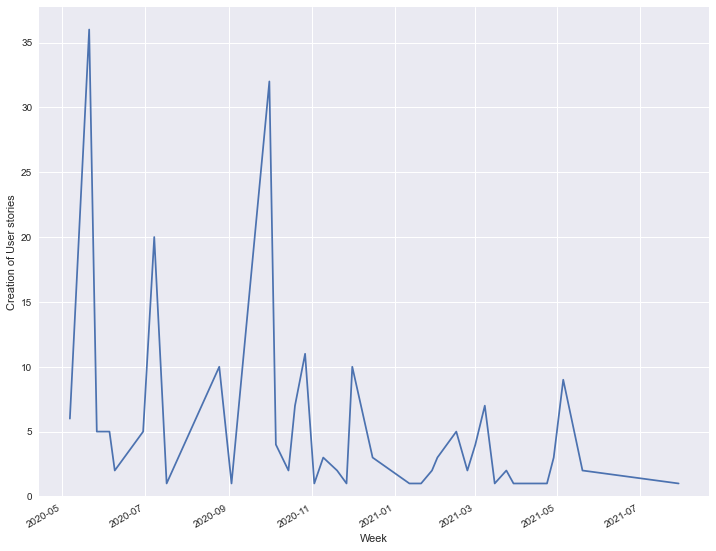

In [38]:
pd.Series(y.values, index=x).plot(figsize=(12, 10)) # We use the indices of x and the values of y
plt.style.use('seaborn')
plt.ylim(0) # Set the lower y value to 0
plt.xlabel('Week') # Label of the x axis
plt.ylabel('Creation of User stories') # Label of the y axis

In [45]:
jira_small2= jira[jira.Type.isin(['Bug'])]
jira_small2

,Summary,key,Type,Status,Reporter,Creator,Created,Updated,last_view,time
800,Not only GR Products shown on console,USSFA-6844,Bug,Open,ELeodi,ELeodi,2022-01-28 15:39:00,2022-01-28 16:00:00,2022-02-03 13:43:00,0
801,Change of account owner restrictions,USSFA-6824,Bug,fix prepared,ELeodi,ELeodi,2022-01-20 13:56:00,2022-02-04 12:29:00,2022-02-07 01:45:00,14
802,Notification field on Contact Object,USSFA-6819,Bug,fix prepared,dmyriounis,dmyriounis,2022-01-18 12:29:00,2022-02-04 12:16:00,2022-02-03 13:33:00,16
803,Object Store key gets stuck (GR),USSFA-6774,Bug,Closed,Gabor.Fal,Gabor.Fal,2022-01-05 11:59:00,2022-01-10 17:27:00,2022-02-07 01:45:00,5
805,[GR] Integration user does not have an access ...,USSFA-6731,Bug,Closed,mchojnacki,mchojnacki,2021-11-30 12:25:00,2021-12-05 22:16:00,2021-12-01 11:57:00,5
...,...,...,...,...,...,...,...,...,...,...
1257,can't change opportunity owner,USSFA-3378,Bug,Closed,ELeodi,ELeodi,2020-10-26 13:26:00,2020-11-24 03:09:00,2022-02-07 01:45:00,28
1258,GR specific value for reason for close,USSFA-3334,Bug,Rejected,tkiritsi,tkiritsi,2020-10-21 15:18:00,2020-11-19 18:19:00,2022-02-07 01:45:00,29
1261,adding products in an opportunity,USSFA-3261,Bug,Closed,ELeodi,ELeodi,2020-10-19 08:59:00,2020-11-24 01:04:00,2022-02-07 01:45:00,35
1262,Initial Opportunity Value,USSFA-3260,Bug,Closed,ELeodi,ELeodi,2020-10-19 08:51:00,2021-01-04 10:38:00,2022-02-07 01:45:00,77


In [46]:
weekly_small2 = jira_small2.groupby(jira_small2.Created.dt.isocalendar().week)
len(weekly_small2)
y = weekly_small2.size()
x = weekly_small2.Created.min()


Text(0, 0.5, 'Creation of Bugs')

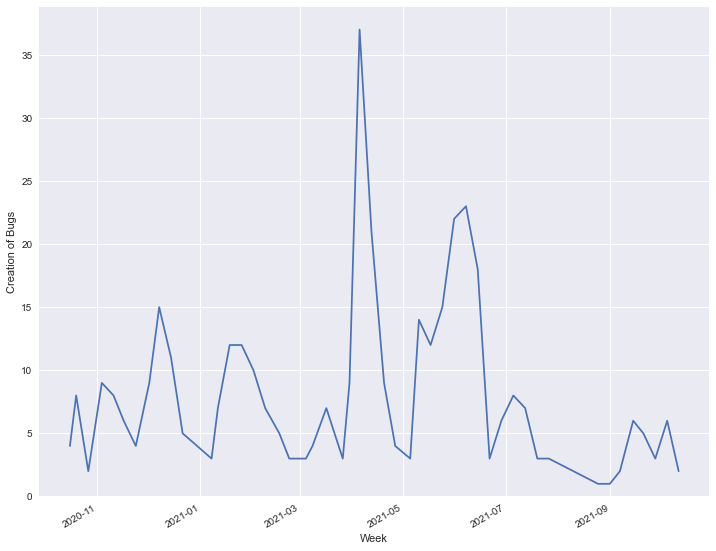

In [47]:
pd.Series(y.values, index=x).plot(figsize=(12, 10)) # We use the indices of x and the values of y
plt.style.use('seaborn')
plt.ylim(0) # Set the lower y value to 0
plt.xlabel('Week') # Label of the x axis
plt.ylabel('Creation of Bugs') # Label of the y axis

C:\Users\ampoura\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

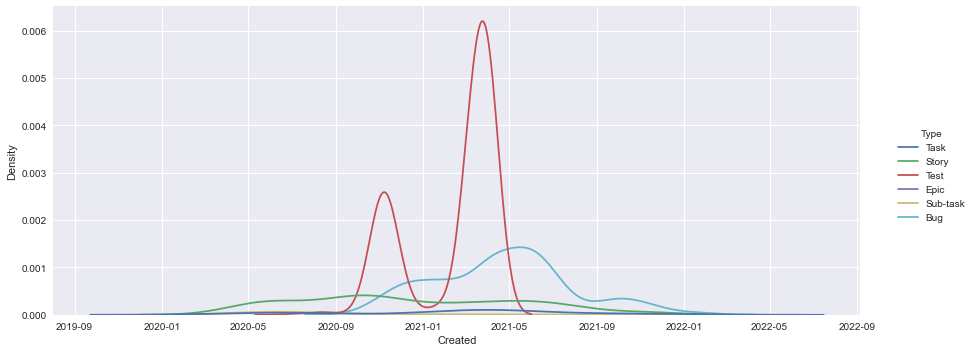

In [42]:
plt.figure(figsize=(16, 10))
sns.displot(x="Created", data=jira, hue="Type", aspect=2.5, kind="kde")

C:\Users\ampoura\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1152x720 with 0 Axes>

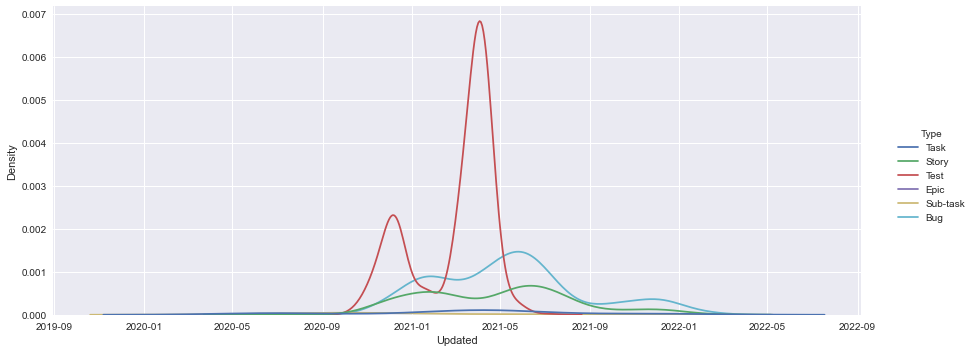

In [43]:
plt.figure(figsize=(16, 10))
sns.displot(x="Updated", data=jira, hue="Type", aspect=2.5, kind="kde")

In [44]:
# Creating a dataset 